# Manuscripts


We scrape the following two websites to get the manuscripts

- [imsdb](http://www.imsdb.com/)
- [springfieldspringfield](https://www.springfieldspringfield.co.uk/)
- [imsdb movie scripts](https://figshare.com/projects/imsdb_movie_scripts/18907)


In [19]:
# lets start by getting the data
import csv
import math
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
import urllib2
import json
import re
import os
import matplotlib.pyplot as plt
import operator

In [9]:
# Get data line by line from tmdb-5000-movie-database and save the data as dictionary

filepath = "/Users/GretarAtli/Documents/GitHub/Dtu/Dtu-SocialGraphs-FinalProject/Data/tmdb-5000-movie-dataset/tmdb_5000_credits.csv"
tmdb_5000_credits = defaultdict(dict)

with open(filepath) as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",")
    for row in reader:
        tmdb_5000_credits[row["title"]] = row


In [10]:
# Get data line by line from tmdb-5000-movie-database and save the data as dictionary

filepath = "/Users/GretarAtli/Documents/GitHub/Dtu/Dtu-SocialGraphs-FinalProject/Data/tmdb-5000-movie-dataset/tmdb_5000_movies.csv"
tmdb_5000_movies = defaultdict(dict)

with open(filepath) as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",")
    for row in reader:
        tmdb_5000_movies[row["title"]] = row
        
for title in sorted(tmdb_5000_movies.keys()):
    title = title.replace(" ","-").replace("(","").replace(")","")

## Get scripts from .txt files 

In [11]:
filepath_scripts =  "/Users/GretarAtli/Dropbox/SocialGraph/scripts/"


# A python dictionary that maintains the information what movie has a manuscript in our database
manuscripts = defaultdict(bool)

for title in sorted(tmdb_5000_credits.keys()):
    title_for_uri = title.replace(" ","-").replace("(","").replace(")","")
    filename = filepath_scripts + title_for_uri + ".txt"
    try:
        print filename
        f = open(filename,"r")
        manuscripts[title] = True
        print True
    except:
        manuscripts[title] = False
        print False

/Users/GretarAtli/Dropbox/SocialGraph/scripts/#Horror.txt
False
/Users/GretarAtli/Dropbox/SocialGraph/scripts/500-Days-of-Summer.txt
True
/Users/GretarAtli/Dropbox/SocialGraph/scripts/10-Cloverfield-Lane.txt
False
/Users/GretarAtli/Dropbox/SocialGraph/scripts/10-Days-in-a-Madhouse.txt
False
/Users/GretarAtli/Dropbox/SocialGraph/scripts/10-Things-I-Hate-About-You.txt
True
/Users/GretarAtli/Dropbox/SocialGraph/scripts/102-Dalmatians.txt
False
/Users/GretarAtli/Dropbox/SocialGraph/scripts/10th-&-Wolf.txt
False
/Users/GretarAtli/Dropbox/SocialGraph/scripts/11:14.txt
False
/Users/GretarAtli/Dropbox/SocialGraph/scripts/12-Angry-Men.txt
False
/Users/GretarAtli/Dropbox/SocialGraph/scripts/12-Rounds.txt
False
/Users/GretarAtli/Dropbox/SocialGraph/scripts/12-Years-a-Slave.txt
True
/Users/GretarAtli/Dropbox/SocialGraph/scripts/127-Hours.txt
True
/Users/GretarAtli/Dropbox/SocialGraph/scripts/13-Going-on-30.txt
False
/Users/GretarAtli/Dropbox/SocialGraph/scripts/13-Hours:-The-Secret-Soldiers-of-Ben

The size of the intersection to our database. In other words the number of scripts that correspond to a movie in our taggle database

## Check intersection

We only want to make analysis on the movies that are part of the kaggle database. Therefore we start by finding the intersection between the scripts database and the kaggle database. In other words we want to find the movies that are part of both databases.

In [50]:
manuscripts_intersection = [key for key,value in manuscripts.items() if value == True]

In [55]:
print("Number of movies that are in both databases is: {} movies".format(len(manuscripts_intersection)))

Number of movies that are in both databases is: 615 movies


## Time span manuscripts

In [49]:
movies_with_manuscripts = [(key, tmdb_5000_movies[key]["release_date"].split("-")[0] ) 
                           for key,value in manuscripts.items() if value == True]

mwm_year_dist = Counter([year for _,year in movies_with_manuscripts])

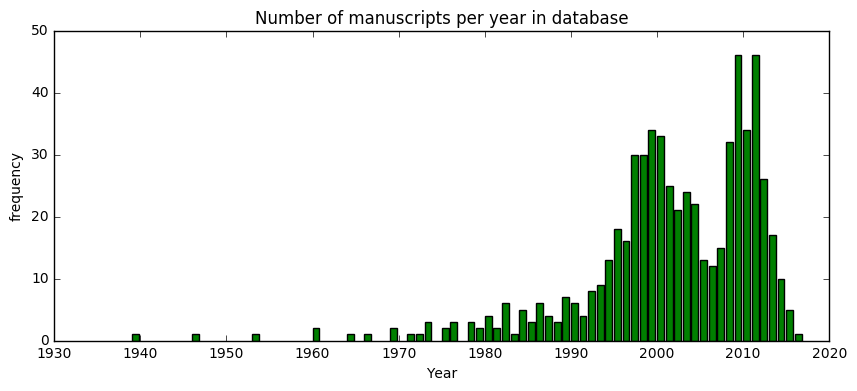

In [46]:
plt.figure(figsize=(10,4))
plt.bar(mwm_year_dist.keys(), mwm_year_dist.values(), color="green")
plt.xlabel("Year")
plt.ylabel("frequency")
plt.title("Number of manuscripts per year in database")
plt.show()

# Sensitivity Analysis


In [ ]:
filepath_scripts =  "/Users/GretarAtli/Dropbox/SocialGraph/scripts/"


# Create a dictionary that is a container for the sensitivity analysis values

for title in manuscripts_intersection:
    title_for_uri = title.replace(" ","-").replace("(","").replace(")","")
    filename = filepath_scripts + title_for_uri + ".txt"
    print filename
    f = open(filename,"r")
